In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
sys.path.append('../')
from plot_utils import *
from preprocess_datasets import load_features_outcomes, make_training_sets
from run_models import run_cph, run_dcph, run_dsm, run_dcm, run_rsf, eval_model
from estimators_demo_utils import plot_performance_metrics

# Make training sets if they haven't been created yet

device = 'cmod'
dataset = 'random100'
numeric_feats = ['ip','Wmhd','n_e','kappa','li']

make_training_sets(device, dataset)

Training shots: 59
Test shots: 20
Validation shots: 20


In [3]:
from auton_survival.preprocessing import Preprocessor
# Load and preprocess training, test, validation sets
outcomes_train, features_train = load_features_outcomes(device, dataset+'_train')
outcomes_test, features_test = load_features_outcomes(device, dataset+'_test')
outcomes_val, features_val = load_features_outcomes(device, dataset+'_val')

# Fit the imputer and scaler to the training data and transform the training, test, and validation data
preprocessor = Preprocessor(cat_feat_strat='ignore', num_feat_strat='mean')
transformer=preprocessor.fit(features_train, cat_feats=[], num_feats=numeric_feats, one_hot=True, fill_value=-1)

x_train = transformer.transform(features_train)
x_test = transformer.transform(features_test)
x_val = transformer.transform(features_val)

y_train = outcomes_train
y_test = outcomes_test
y_val = outcomes_val

# Print a warning if there are any missing values
if x_train.isnull().values.any():
    print('Warning: missing values in training features')
if x_test.isnull().values.any():
    print('Warning: missing values in test features')
if x_val.isnull().values.any():
    print('Warning: missing values in validation features')

if y_train.isnull().values.any():
    print('Warning: missing values in training outcomes')
if y_test.isnull().values.any():
    print('Warning: missing values in test outcomes')
if y_val.isnull().values.any():
    print('Warning: missing values in validation outcomes')


In [7]:
# Run all the models
#cph_model = run_cph(x_train, x_val, y_train, y_val)
#dcph_model = run_dcph(x_train, x_val, y_train, y_val)
dsm_model = run_dsm(x_train, x_val, y_train, y_val)
dcm_model = run_dcm(x_train, x_val, y_train, y_val)
rsf_model = run_rsf(x_train, x_val, y_train, y_val)

# Evaluate all the models
#cph_results, cph_times = eval_model(cph_model, x_test, y_train, y_test)
#dcph_results, dcph_times = eval_model(dcph_model, x_test, y_train, y_test)
dsm_results, dsm_times = eval_model(dsm_model, x_test, y_train, y_test)
dcm_results, dcm_times = eval_model(dcm_model, x_test, y_train, y_test)
rsf_results, rsf_times = eval_model(rsf_model, x_test, y_train, y_test)

# Plot the results
cph_title = 'Cox Proportional Hazards on ' + dataset + ' dataset'
dcph_title = 'Deep Cox Proportional Hazards on ' + dataset + ' dataset'
dsm_title = 'Deep Survival Machines on ' + dataset + ' dataset'
dcm_title = 'Deep Cox Machines on ' + dataset + ' dataset'
rsf_title = 'Random Survival Forest on ' + dataset + ' dataset'

#plot_performance_metrics(cph_results, cph_times, cph_title)
#plot_performance_metrics(dcph_results, dcph_times, dcph_title)
plot_performance_metrics(dsm_results, dsm_times, dsm_title)
plot_performance_metrics(dcm_results, dcm_times, dcm_title)
plot_performance_metrics(rsf_results, rsf_times, rsf_title)


100%|██████████| 50/50 [00:02<00:00, 16.87it/s]


NaN in predictions_val


ValueError: Input estimate contains NaN.

100%|██████████| 50/50 [00:02<00:00, 24.15it/s]


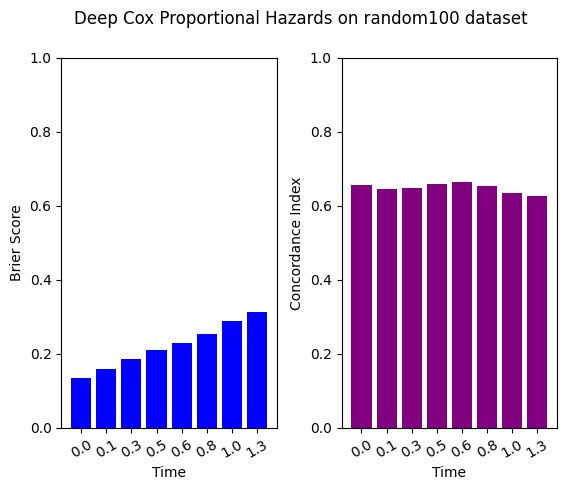